## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.io import loadmat
from scipy.optimize import minimize
# some settings
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## Logistic regression 

#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [2]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [3]:
def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(np.log(h).T.dot(y)+ np.log(1-h).T.dot(1-y))/m
    return J[0]

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [4]:
def gradientLog(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta_in.reshape(-1,1)))
    grad =1/(m)*X.T.dot(h-y)
    return(grad.flatten())

In [6]:
data = pd.read_csv('res/ex2data1.txt',header= None, names=['ExamScore1','ExamScore2','Admitted'])

In [7]:
# append bias terms
X = np.c_[np.ones(data.shape[0]),data.ExamScore1.values, data.ExamScore2.values]
y = np.c_[data.Admitted.values]

In [8]:
theta_in = np.zeros((X.shape[1],1))
cost = cost_function(theta_in,X,y)
grad = gradientLog(theta_in, X,y)

In [9]:
print cost

[ 0.69314718]


### Optimization

[scipy-optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html)

In [132]:
def optimizeTheta(theta_in,X,y):
    result = sp.optimize.fmin(cost_function, theta_in, (X,y),maxiter=10000)
    return result

In [11]:
result = optimizeTheta(theta_in,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [12]:
print result

[-25.16130062   0.20623142   0.20147143]


In [13]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p.astype('int')

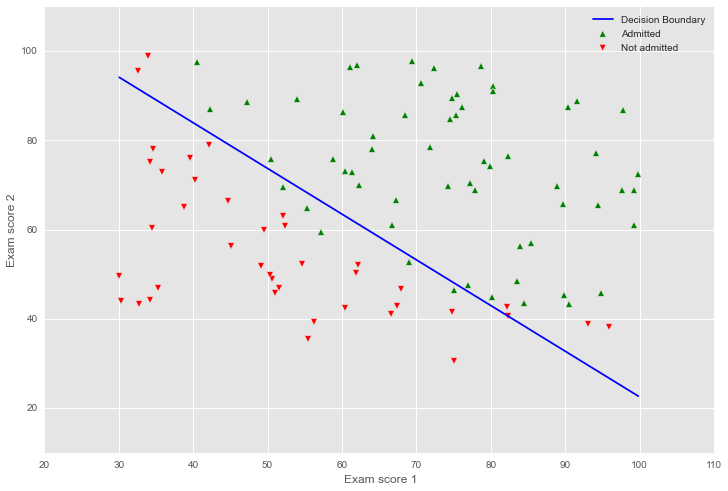

In [15]:
yy = result[0]* X[:,0] + result[1]* X[:,1] + result[2] * X[:,2]
pos = data.Admitted == 1
neg = data.Admitted == 0
plt.scatter(data.ExamScore1[pos], data.ExamScore2[pos], s= 45, c= 'g',marker='^',label= 'Admitted')
plt.scatter(data.ExamScore1[neg], data.ExamScore2[neg], s= 45, c= 'r',marker='v',label='Not admitted')
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./result[2])*(result[0] + result[1]*boundary_xs)
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')

## Regularized Logistic regression

$$ 
\begin{align*}
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
\end{align*}
$$


$$ 
\begin{align*}
& \text{Repeat}\ \lbrace \newline
& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline
& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline
& \rbrace
\end{align*}
$$


A small modification leads to..
$$
\theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

You don't typically have to write the gradient, scipy will do that automatically for you. 

(Oh my, what was I thinking? You have to write the gradient, the derivative will have the regularization in it. How will scipy do that automatically, huh?)

It worked for ordinary logistic regression because it is a simple cost function (convex optimization problem) and scipy would be able to find approximately close minima.

In [16]:
# define regularization
reg = 0.3

In [113]:
def cost_function_reg(theta, X, y, reg = reg):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1*(np.log(h).T.dot(y)+ np.log(1-h).T.dot(1-y))/m) + ((reg * np.sum(np.square(theta[1:])))/(2*m))
    return J[0]

In [84]:
def optimizeThetaReg(theta_in,X,y):
    result = sp.optimize.fmin(cost_function_reg, theta_in, (X,y),maxiter =1000)
    return result

In [85]:
#test
reg = 0
optimizeThetaReg(theta_in,X,y)

Optimization terminated successfully.
         Current function value: 0.690583
         Iterations: 104
         Function evaluations: 181


array([-0.01743325, -0.26539189, -0.01161251])

## Visualization

In [86]:
data = pd.read_csv('res/ex2data2.txt', header= None, names = ['Test1','Test2','result'])

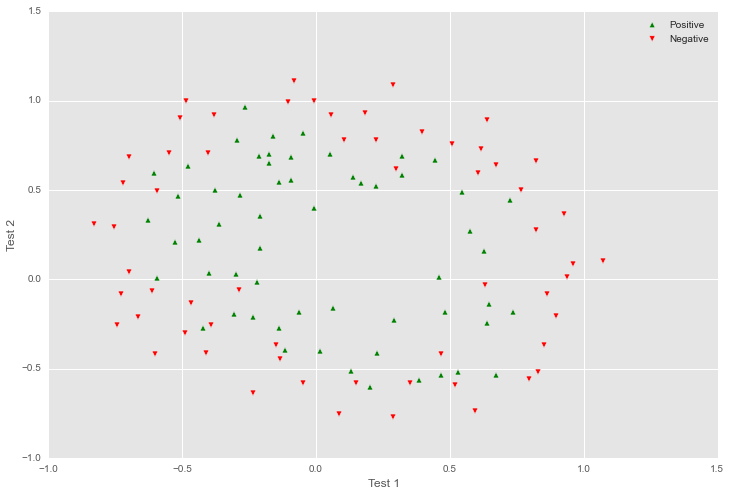

In [87]:
pos = data.result == 1
neg = data.result == 0
plt.scatter(data.Test1[pos], data.Test2[pos], s= 35, c= 'g',marker='^',label= 'Positive')
plt.scatter(data.Test1[neg], data.Test2[neg], s= 35, c= 'r',marker='v',label='Negative')
plt.legend()
plt.xlabel('Test 1')
plt.ylabel('Test 2')

In [88]:
X = np.c_[np.ones(data.shape[0]),data.Test1.values, data.Test2.values]
y = np.c_[data.result.values]

Now, we will map the given features in to different order polynomial features.

In [89]:
p = PolynomialFeatures(6)
poly = p.fit_transform(data.iloc[:,0:2])
reg = 1

In [90]:
initial_theta = np.zeros(poly.shape[1])
fit_coef = optimizeThetaReg(initial_theta,poly, y)

In [91]:
fit_coef

array([ 0.09825625, -0.05816431,  0.40454223, -1.17992861,  0.19122046,
       -0.07195087, -0.07769308, -0.19346836,  0.04011943,  0.04098739,
       -0.41043989,  0.46907498,  0.95748747, -0.63115279, -0.32072333,
       -0.25332365,  0.15354664,  0.02277994,  0.08946235,  0.11973378,
       -0.15824304, -0.05426605, -0.20430161,  0.29093254,  0.3655664 ,
        0.07702111,  0.24283049, -0.14885923])

In [92]:
prob = sigmoid(fit_coef.dot(poly.T))
# bad accu, bad solution overall

I think my intuition about not calculating the gradients isn't right. Looks like we have to write the gradient to solve this problem.

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$

In [156]:
def gradientLogReg(theta,X,y,reg):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    # don't reg intercept, how do i vectorize this?
    grad = (X.T.dot(h-y))/m + (reg) * (np.r_[[[0]],theta[1:].reshape(-1,1)])/m
    return grad.flatten()

In [159]:
reg= 100
result = minimize(cost_function_reg, initial_theta, args=(poly, y, reg), 
                  method= None, jac=gradientLogReg, options={'maxiter':10000})

In [161]:
#test
100.0*sum(predict(result.x, poly) == y.ravel())/y.size

61.016949152542374

## Regularization accuracy

reg = 0 probable overfitting

reg = 1 optimal

reg=100 highly regularized, underfit

Accuracy for regularization= 0.000000 is 91.525424
Accuracy for regularization= 1.000000 is 83.050847
Accuracy for regularization= 10.000000 is 74.576271
Accuracy for regularization= 15.000000 is 69.491525
Accuracy for regularization= 30.000000 is 67.796610
Accuracy for regularization= 45.000000 is 68.644068
Accuracy for regularization= 55.000000 is 66.101695
Accuracy for regularization= 65.000000 is 64.406780
Accuracy for regularization= 75.000000 is 64.406780
Accuracy for regularization= 85.000000 is 63.559322
Accuracy for regularization= 100.000000 is 61.016949


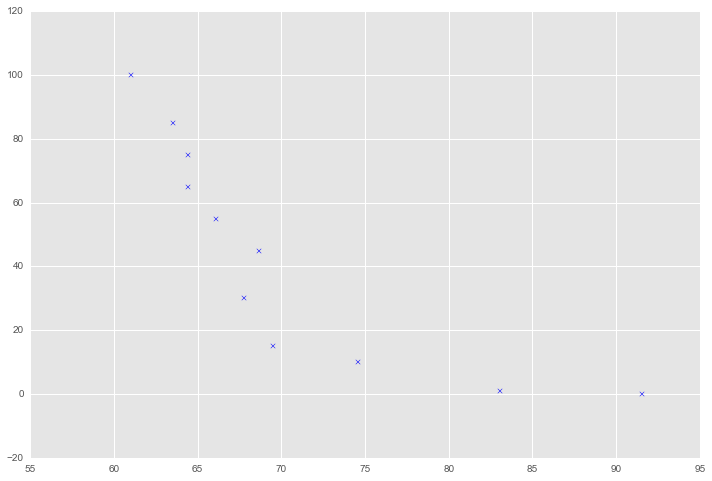

In [183]:
for i, reg in enumerate([0,1,10,15,30,45,55,65,75,85,100]):
    reg = reg
    result = minimize(cost_function_reg, initial_theta, args=(poly, y, reg), 
                  method= None, jac=gradientLogReg, options={'maxiter':10000})
    accuracy = 100.0*sum(predict(result.x, poly) == y.ravel())/y.size    
    print('Accuracy for regularization= %f is %f') %(reg,accuracy)
    plt.scatter(x=accuracy,y=reg,marker='x')    